# Assignment 1: Time Series Forecast With Python (Seasonal ARIMA)

**Lecturer**: Vincent Claes<br>
**Authors:** Bryan Honof, Jeffrey Gorissen<br>
**Start Date:** 19/10/2018
    
**Objective:** Visualize and predict the future temperatures via ARIMA

**Description:** In this notebook we train our model

In [1]:
import math
import warnings
import datetime

import pandas            as pd
import itertools         as it
import statsmodels.api   as sm
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore") # specify to ignore warning messages

In [2]:
data_csv = pd.read_csv('./data/rolmean_data.csv')
data = pd.DataFrame()

# Convert the creation_date column to datetime64
data['dateTime'] = pd.to_datetime(data_csv['dateTime'])
# Convert the value column to float
data['temperature'] = pd.to_numeric(data_csv['temperature'])

# Set the dateTime column as index
data = data.set_index(['dateTime'])

# Sort the dataFrame just to be sure...
data = data.sort_index()

data = data.dropna()

# Double check the results
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 828 entries, 2018-11-11 03:00:00 to 2018-11-19 17:45:00
Data columns (total 1 columns):
temperature    828 non-null float64
dtypes: float64(1)
memory usage: 12.9 KB


In [3]:
data.tail(5)

,temperature
dateTime,
2018-11-19 16:45:00,17.28
2018-11-19 17:00:00,17.29
2018-11-19 17:15:00,17.23
2018-11-19 17:30:00,17.21
2018-11-19 17:45:00,17.03


In [5]:
mod = sm.tsa.statespace.SARIMAX(data,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 15),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                        temperature   No. Observations:                  828
Model:             SARIMAX(1, 1, 1)x(0, 0, 1, 15)   Log Likelihood                1064.713
Date:                            Mon, 19 Nov 2018   AIC                          -2121.426
Time:                                    19:29:22   BIC                          -2102.638
Sample:                                11-11-2018   HQIC                         -2114.213
                                     - 11-19-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9718      0.010     94.349      0.000       0.952       0.992
ma.L1         -0.6230      0.023   

In [36]:
#The code requires the forecasts to start at January 1998
#The dynamic=False argument ensures that we produce one-step ahead forecasts, 
#meaning that forecasts at each point are generated using the full history up to that point.
pred = results.get_prediction()
pred_ci = pred.conf_int()

In [37]:
data[data.index >= '2018-11-11 03'].tail(5)

,temperature
dateTime,
2018-11-19 16:45:00,17.28
2018-11-19 17:00:00,17.29
2018-11-19 17:15:00,17.23
2018-11-19 17:30:00,17.21
2018-11-19 17:45:00,17.03


In [38]:
pred_ci.head(5)

,lower temperature,upper temperature
2018-11-11 03:00:00,-2771.807649,2771.807649
2018-11-11 03:15:00,-2348.264984,2407.968732
2018-11-11 03:30:00,-1940.090890,1979.837091
2018-11-11 03:45:00,-1940.043145,1979.884836
2018-11-11 04:00:00,-1940.290044,1979.637936


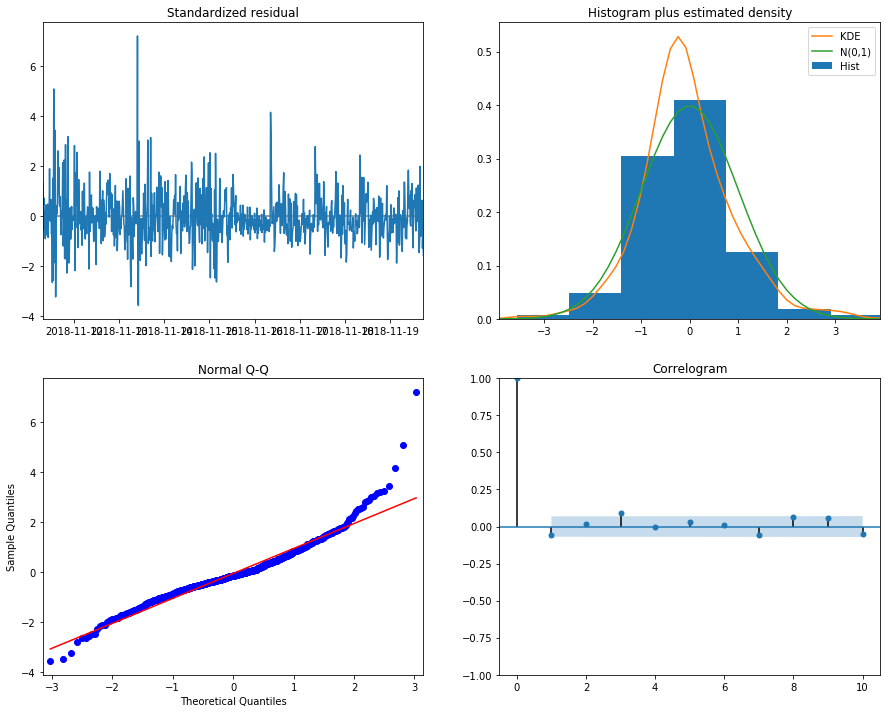

In [41]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [52]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=96)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [53]:
pred_ci.head()

,lower temperature,upper temperature
2018-11-19 18:00:00,16.846106,17.096606
2018-11-19 18:15:00,16.655556,17.076167
2018-11-19 18:30:00,16.472931,17.069314
2018-11-19 18:45:00,16.225652,17.007333
2018-11-19 19:00:00,16.051962,17.028619


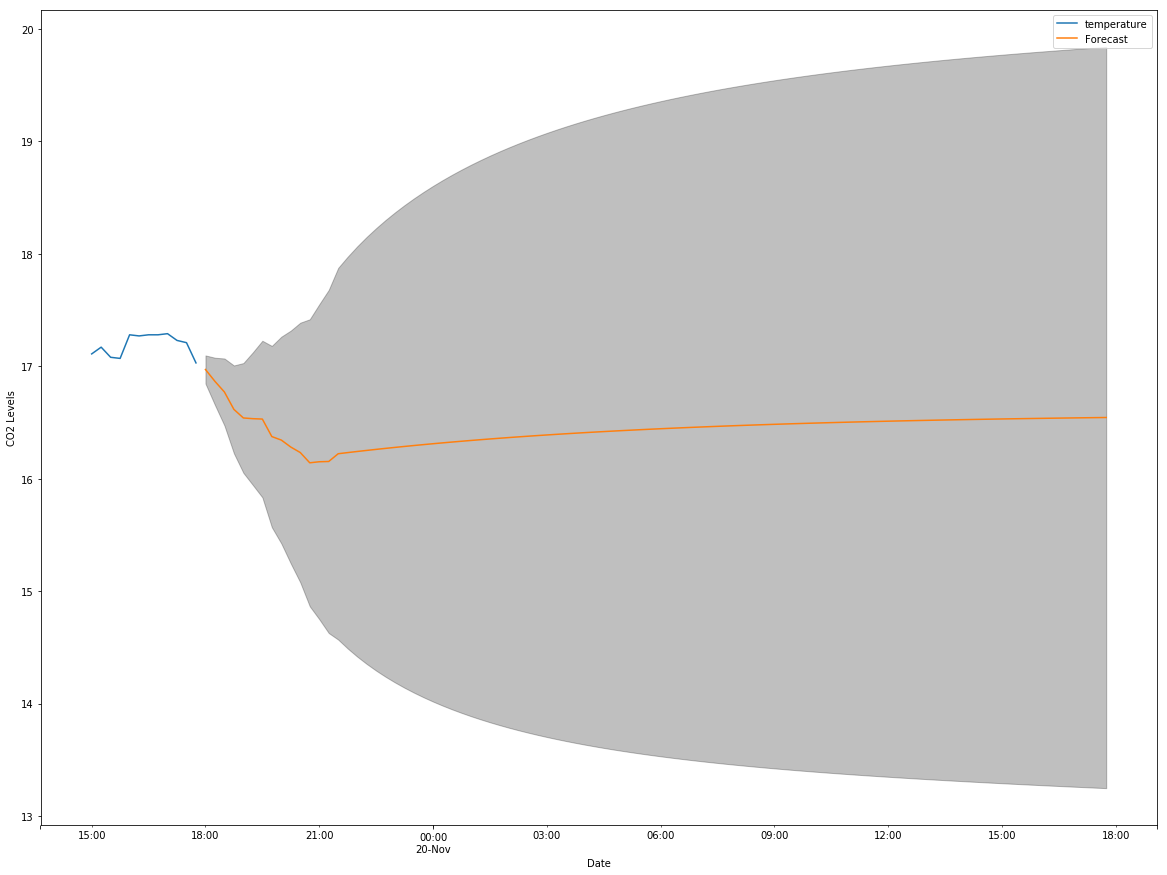

In [54]:
ax = data['2018-11-19 15':].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()